## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
x_train, y_train = train
x_test, y_test = test
x_train = x_train / 255.
x_test = x_test / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Convert y to onehot
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=256, activation='relu')(input_layer)
    x = keras.layers.Dense(units=128, activation='relu')(x)
    x = keras.layers.Dense(units=64, activation='relu')(x)
    x = keras.layers.Dense(units=32, activation='relu')(x)
    out = keras.layers.Dense(units=10, activation='softmax')(x)
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model
model = build_mlp()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_8 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 830,250
Trainable params: 830,250
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile your model
"""
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics = ['accuracy'])

In [7]:
"""
Set epochs
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 5s 96us/step - loss: 2.1461 - acc: 0.1951 - val_loss: 2.0298 - val_acc: 0.2577
Epoch 2/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.9794 - acc: 0.2807 - val_loss: 2.0601 - val_acc: 0.2633
Epoch 3/500
50000/50000 [==============================] - 4s 75us/step - loss: 1.9065 - acc: 0.3209 - val_loss: 1.9070 - val_acc: 0.3180
Epoch 4/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.8458 - acc: 0.3415 - val_loss: 1.8492 - val_acc: 0.3407
Epoch 5/500
50000/50000 [==============================] - 4s 80us/step - loss: 1.8052 - acc: 0.3596 - val_loss: 1.8037 - val_acc: 0.3479
Epoch 6/500
50000/50000 [==============================] - 4s 76us/step - loss: 1.7689 - acc: 0.3724 - val_loss: 1.8119 - val_acc: 0.3497
Epoch 7/500
50000/50000 [==============================] - 5s 94us/step - loss: 1.7412 - acc: 0.3820 - val_loss: 1.7325 - 

50000/50000 [==============================] - 4s 73us/step - loss: 1.2125 - acc: 0.5710 - val_loss: 1.4394 - val_acc: 0.4983
Epoch 60/500
50000/50000 [==============================] - 4s 74us/step - loss: 1.2119 - acc: 0.5714 - val_loss: 1.4796 - val_acc: 0.4755
Epoch 61/500
50000/50000 [==============================] - 4s 78us/step - loss: 1.2031 - acc: 0.5753 - val_loss: 1.5467 - val_acc: 0.4734
Epoch 62/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.2036 - acc: 0.5758 - val_loss: 1.4411 - val_acc: 0.4980
Epoch 63/500
50000/50000 [==============================] - 4s 81us/step - loss: 1.1961 - acc: 0.5744 - val_loss: 1.5045 - val_acc: 0.4816
Epoch 64/500
50000/50000 [==============================] - 5s 92us/step - loss: 1.1863 - acc: 0.5797 - val_loss: 1.5320 - val_acc: 0.4631
Epoch 65/500
50000/50000 [==============================] - 4s 85us/step - loss: 1.1853 - acc: 0.5788 - val_loss: 1.5109 - val_acc: 0.4774
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.9255 - acc: 0.6699 - val_loss: 1.6189 - val_acc: 0.4716
Epoch 119/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.9406 - acc: 0.6656 - val_loss: 1.5238 - val_acc: 0.4986
Epoch 120/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9231 - acc: 0.6724 - val_loss: 1.5349 - val_acc: 0.5019
Epoch 121/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.9303 - acc: 0.6710 - val_loss: 1.6277 - val_acc: 0.4758
Epoch 122/500
50000/50000 [==============================] - 4s 79us/step - loss: 0.9092 - acc: 0.6775 - val_loss: 1.5300 - val_acc: 0.5017
Epoch 123/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.9002 - acc: 0.6802 - val_loss: 1.4693 - val_acc: 0.5128
Epoch 124/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.9098 - acc: 0.6762 - val_loss: 1.6469 - val_acc: 0.4677
Epoch 125/500
50000/

50000/50000 [==============================] - 4s 75us/step - loss: 0.7043 - acc: 0.7517 - val_loss: 1.9755 - val_acc: 0.4703
Epoch 177/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.6996 - acc: 0.7502 - val_loss: 1.8179 - val_acc: 0.4815
Epoch 178/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.6859 - acc: 0.7564 - val_loss: 1.6500 - val_acc: 0.5176
Epoch 179/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.6834 - acc: 0.7601 - val_loss: 1.8357 - val_acc: 0.4732
Epoch 180/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.6744 - acc: 0.7604 - val_loss: 1.6959 - val_acc: 0.5110
Epoch 181/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.6745 - acc: 0.7614 - val_loss: 1.9935 - val_acc: 0.4461
Epoch 182/500
50000/50000 [==============================] - 5s 101us/step - loss: 0.6739 - acc: 0.7610 - val_loss: 1.7799 - val_acc: 0.4949
Epoch 183/500
50000/50000 [======

50000/50000 [==============================] - 4s 74us/step - loss: 0.4921 - acc: 0.8277 - val_loss: 2.1854 - val_acc: 0.4843
Epoch 235/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.5043 - acc: 0.8243 - val_loss: 1.9897 - val_acc: 0.5080
Epoch 236/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.4939 - acc: 0.8285 - val_loss: 2.0060 - val_acc: 0.4973
Epoch 237/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.5207 - acc: 0.8183 - val_loss: 2.0742 - val_acc: 0.4883 0s - loss: 0.5171 
Epoch 238/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.4727 - acc: 0.8327 - val_loss: 2.3793 - val_acc: 0.4603
Epoch 239/500
50000/50000 [==============================] - 4s 75us/step - loss: 0.4912 - acc: 0.8287 - val_loss: 2.1307 - val_acc: 0.4978
Epoch 240/500
50000/50000 [==============================] - 4s 76us/step - loss: 0.4779 - acc: 0.8329 - val_loss: 2.2783 - val_acc: 0.4675
Epoch 241/500
5

50000/50000 [==============================] - 4s 73us/step - loss: 0.3897 - acc: 0.8643 - val_loss: 2.4933 - val_acc: 0.4720
Epoch 293/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3638 - acc: 0.8738 - val_loss: 2.3093 - val_acc: 0.5088
Epoch 294/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3099 - acc: 0.8955 - val_loss: 2.5962 - val_acc: 0.4865
Epoch 295/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3842 - acc: 0.8741 - val_loss: 2.4588 - val_acc: 0.4809
Epoch 296/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.4626 - acc: 0.8563 - val_loss: 2.3751 - val_acc: 0.4981
Epoch 297/500
50000/50000 [==============================] - 4s 73us/step - loss: 0.3348 - acc: 0.8866 - val_loss: 3.0762 - val_acc: 0.4536
Epoch 298/500
50000/50000 [==============================] - 4s 74us/step - loss: 0.2973 - acc: 0.9028 - val_loss: 2.7839 - val_acc: 0.4724
Epoch 299/500
50000/50000 [=======

50000/50000 [==============================] - 4s 88us/step - loss: 0.2167 - acc: 0.9345 - val_loss: 2.8337 - val_acc: 0.5066
Epoch 351/500
50000/50000 [==============================] - 4s 88us/step - loss: 0.2002 - acc: 0.9393 - val_loss: 2.9758 - val_acc: 0.4889
Epoch 352/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.3261 - acc: 0.9002 - val_loss: 2.7666 - val_acc: 0.5049
Epoch 353/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.2537 - acc: 0.9202 - val_loss: 2.7549 - val_acc: 0.4994
Epoch 354/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.3792 - acc: 0.8870 - val_loss: 2.6569 - val_acc: 0.5025
Epoch 355/500
50000/50000 [==============================] - 4s 87us/step - loss: 0.1513 - acc: 0.9553 - val_loss: 2.7233 - val_acc: 0.5055
Epoch 356/500
50000/50000 [==============================] - 5s 97us/step - loss: 0.1703 - acc: 0.9458 - val_loss: 2.8718 - val_acc: 0.5006
Epoch 357/500
50000/50000 [=======

50000/50000 [==============================] - 4s 89us/step - loss: 0.0702 - acc: 0.9843 - val_loss: 3.1420 - val_acc: 0.5028
Epoch 409/500
50000/50000 [==============================] - 5s 91us/step - loss: 0.2552 - acc: 0.9290 - val_loss: 3.1108 - val_acc: 0.5053
Epoch 410/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.0611 - acc: 0.9878 - val_loss: 3.1735 - val_acc: 0.5041
Epoch 411/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0596 - acc: 0.9877 - val_loss: 3.4569 - val_acc: 0.4828
Epoch 412/500
50000/50000 [==============================] - 7s 142us/step - loss: 0.4769 - acc: 0.8645 - val_loss: 3.1437 - val_acc: 0.5017
Epoch 413/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.0844 - acc: 0.9780 - val_loss: 3.0755 - val_acc: 0.5061
Epoch 414/500
50000/50000 [==============================] - 5s 92us/step - loss: 0.0616 - acc: 0.9874 - val_loss: 3.0803 - val_acc: 0.5159
Epoch 415/500
50000/50000 [===

50000/50000 [==============================] - 5s 106us/step - loss: 0.0316 - acc: 0.9961 - val_loss: 3.4012 - val_acc: 0.5093
Epoch 467/500
50000/50000 [==============================] - 6s 111us/step - loss: 0.0293 - acc: 0.9964 - val_loss: 3.4509 - val_acc: 0.5069
Epoch 468/500
50000/50000 [==============================] - 5s 95us/step - loss: 0.0286 - acc: 0.9966 - val_loss: 3.3989 - val_acc: 0.5155
Epoch 469/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0261 - acc: 0.9972 - val_loss: 3.4453 - val_acc: 0.5124
Epoch 470/500
50000/50000 [==============================] - 4s 86us/step - loss: 0.0253 - acc: 0.9972 - val_loss: 3.4332 - val_acc: 0.5079
Epoch 471/500
50000/50000 [==============================] - 6s 117us/step - loss: 0.0248 - acc: 0.9972 - val_loss: 3.4629 - val_acc: 0.5119
Epoch 472/500
50000/50000 [==============================] - 7s 145us/step - loss: 0.0228 - acc: 0.9981 - val_loss: 3.4655 - val_acc: 0.5140
Epoch 473/500
50000/50000 [==

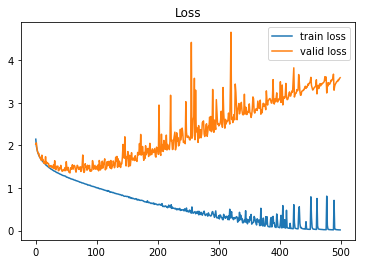

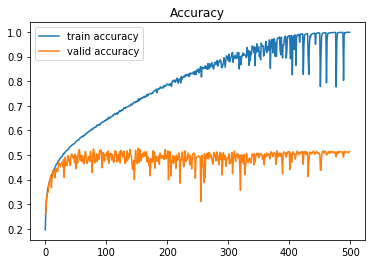

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
"""
Get the training loss / validation loss / training accuracy / validation accuracy and plot them
"""

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [11]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [12]:
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 135us/step - loss: 5.0400 - acc: 0.2626 - val_loss: 1.8370 - val_acc: 0.3389
Epoch 2/100
50000/50000 [==============================] - 6s 119us/step - loss: 1.7051 - acc: 0.3881 - val_loss: 1.7113 - val_acc: 0.3834
Epoch 3/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.5880 - acc: 0.4288 - val_loss: 1.5706 - val_acc: 0.4397
Epoch 4/100
50000/50000 [==============================] - 6s 114us/step - loss: 1.5300 - acc: 0.4483 - val_loss: 1.6063 - val_acc: 0.4223
Epoch 5/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.4863 - acc: 0.4682 - val_loss: 1.5572 - val_acc: 0.4473
Epoch 6/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.4498 - acc: 0.4780 - val_loss: 1.5463 - val_acc: 0.4456
Epoch 7/100
50000/50000 [==============================] - 5s 106us/step - loss: 1.4156 - acc: 0.4922 - val_loss: 1.

50000/50000 [==============================] - 6s 125us/step - loss: 0.8936 - acc: 0.6803 - val_loss: 1.5856 - val_acc: 0.5086
Epoch 60/100
50000/50000 [==============================] - 6s 120us/step - loss: 0.8705 - acc: 0.6887 - val_loss: 1.6207 - val_acc: 0.5144
Epoch 61/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.8732 - acc: 0.6853 - val_loss: 1.6218 - val_acc: 0.5026
Epoch 62/100
50000/50000 [==============================] - 6s 122us/step - loss: 0.8735 - acc: 0.6844 - val_loss: 1.6281 - val_acc: 0.5059
Epoch 63/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.8692 - acc: 0.6885 - val_loss: 1.6116 - val_acc: 0.5094
Epoch 64/100
50000/50000 [==============================] - 6s 123us/step - loss: 0.8493 - acc: 0.6953 - val_loss: 1.6168 - val_acc: 0.5098
Epoch 65/100
50000/50000 [==============================] - 6s 124us/step - loss: 0.8335 - acc: 0.7005 - val_loss: 1.6443 - val_acc: 0.5133
Epoch 66/100
50000/50000 [=======

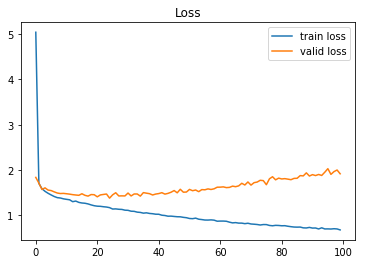

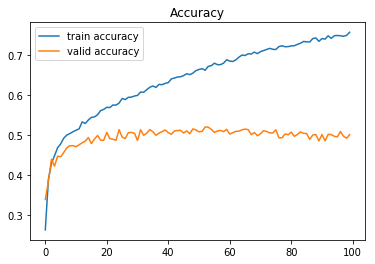

In [13]:
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()